## EDA on the Crop Production Index data

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [75]:
crop_production_data = pd.read_csv("AgroDevelopment/Crop Production Index (2014-2016 100).csv")

In [76]:
crop_production_data.head(10)

,,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,45,57.7,54.9,57.7,59,59.9,60.3,63.1,64.9,...,93,99.8,95.7,104.5,99.7,94.9,121.7,129.4,121.5,..
1,Albania,50.8,36.7,40.5,47.9,47.9,49,48.7,50.4,53.8,...,93.7,95.9,99.9,104.2,105.8,106.2,107.8,114.1,114.8,..
2,Algeria,24.8,33.1,35.9,32,27.5,33,43.3,30.8,36.3,...,98.8,94.9,101.7,103.3,104.4,115.4,121,121,108.8,..
3,American Samoa,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,Angola,14.6,15.6,16.6,16.2,19.7,19.5,19.8,18.9,23,...,114.2,97.6,100.4,102.1,102.7,105.9,107.6,113.3,115.5,..
6,Antigua and Barbuda,89.7,96.2,97,96.3,96,93.7,95.9,97.9,96.9,...,100.7,100.8,101,98.2,89.7,88,84.8,81.2,81.5,..
7,Argentina,39.2,42.3,43.1,40.8,43.9,49.5,47.4,53.5,61.8,...,90.6,94.2,104.1,101.7,106.8,92.2,113.1,107.4,106.6,..
8,Armenia,..,..,46.5,42.2,50,48.2,50.6,39.3,44.2,...,95.7,99.1,110.6,90.3,87.9,71.7,68.5,76.3,77.9,..
9,Aruba,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [77]:
# Set the Country Name as the Key Value
crop_production_data.set_index(" ", inplace=True)

In [78]:
# Remove Empty Columns
crop_production_data = crop_production_data.drop(columns=['2022'])

In [79]:
# Convert String data to Float data and Standardize missing numeric data to "NaN" type
for col in crop_production_data.columns:
    crop_production_data[col] = crop_production_data[col].apply(lambda x: float(x) if pd.notnull(x) and str(x).replace('.', '', 1).isdigit() else np.nan)

In [80]:
# Remove rows where all values are NaN and store them in a residual DataFrame
clean_CropProdIndex_df = crop_production_data.dropna(how='all')

# Create a DataFrame containing only the removed rows
removed_rows_df = crop_production_data.drop(clean_CropProdIndex_df.index)

In [81]:
print(f"Amount of Countries Left: {len(clean_CropProdIndex_df)}")
print(f"Amount of Removed Countries: {len(removed_rows_df)}")

Amount of Countries Left: 195
Amount of Removed Countries: 22


 
Armenia                    2
Azerbaijan                 2
Belarus                    2
Belgium                   10
Bosnia and Herzegovina     2
Croatia                    2
Czechia                    3
Eritrea                    3
Estonia                    2
Ethiopia                   3
Georgia                    2
Kazakhstan                 2
Kyrgyz Republic            2
Latvia                     2
Lithuania                  2
Luxembourg                10
Marshall Islands           1
Micronesia, Fed. Sts.      1
Moldova                    2
Montenegro                16
North Macedonia            2
Russian Federation         2
Serbia                    16
Slovak Republic            3
Slovenia                   2
South Sudan               22
Sudan                     22
Tajikistan                 2
Turkmenistan               2
Ukraine                    2
Uzbekistan                 2
West Bank and Gaza         4
dtype: int64


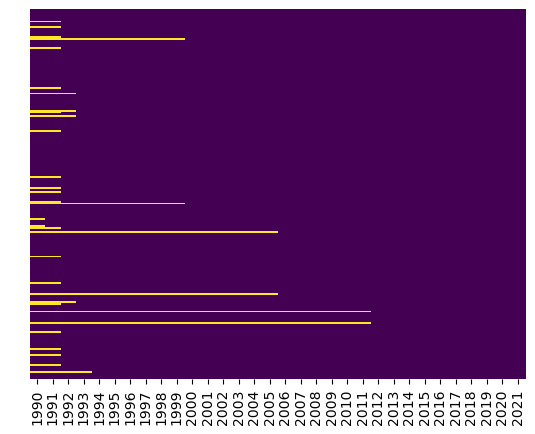

In [82]:
# Verify the amount of NaN values left on the clean df
sns.heatmap(clean_CropProdIndex_df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

print(clean_CropProdIndex_df.isna().sum(axis=1)[clean_CropProdIndex_df.isna().sum(axis=1) > 0])

As we can see, there are some countries that have lots of missing values. But that's not a problem to our Streamlit view

In [83]:
removed_rows_df.index # Counties with no data

Index(['American Samoa', 'Andorra', 'Aruba', 'Bermuda',
       'British Virgin Islands', 'Cayman Islands', 'Channel Islands',
       'Curacao', 'Gibraltar', 'Greenland', 'Guam', 'Isle of Man', 'Kosovo',
       'Liechtenstein', 'Monaco', 'Northern Mariana Islands', 'Palau',
       'San Marino', 'Sint Maarten (Dutch part)', 'St. Martin (French part)',
       'Turks and Caicos Islands', 'Virgin Islands (U.S.)'],
      dtype='object', name=' ')

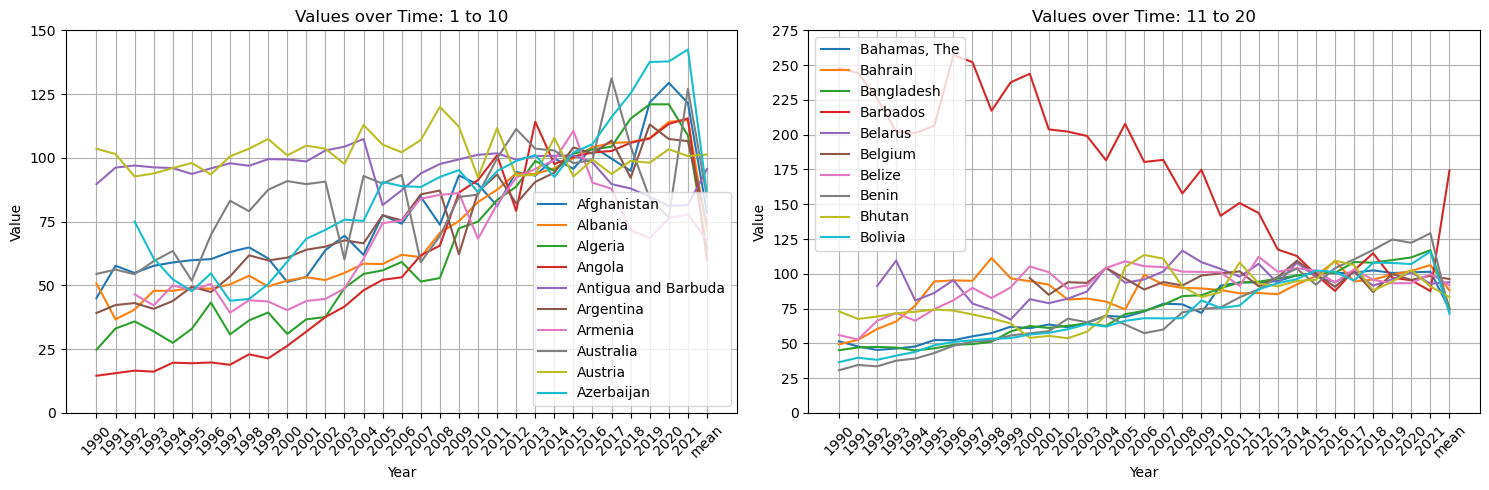

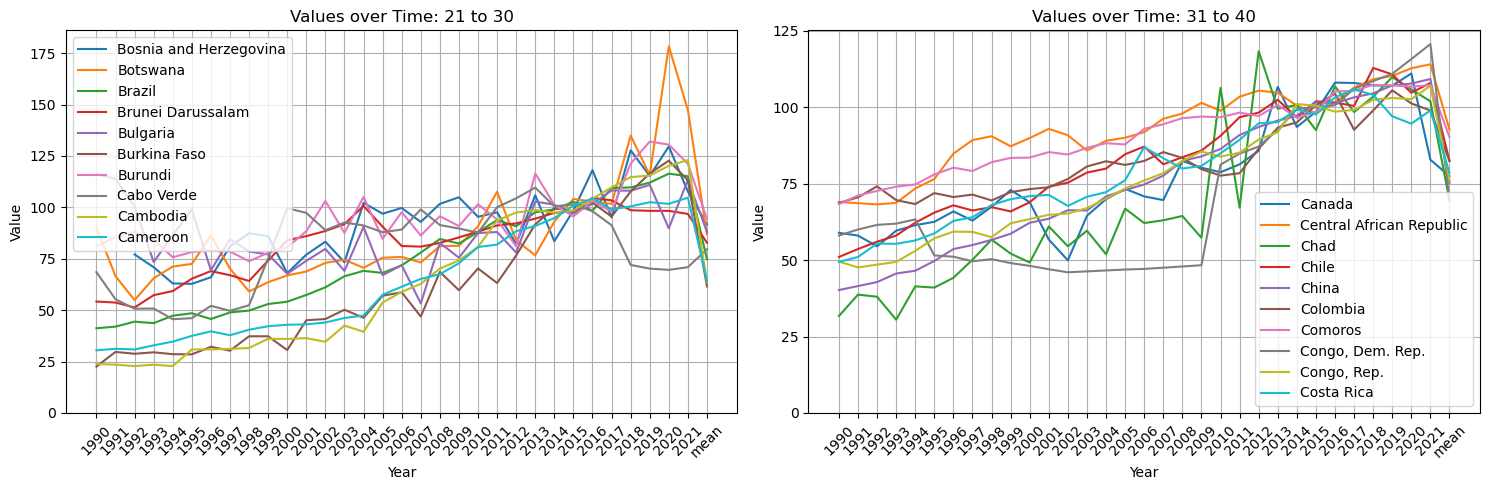

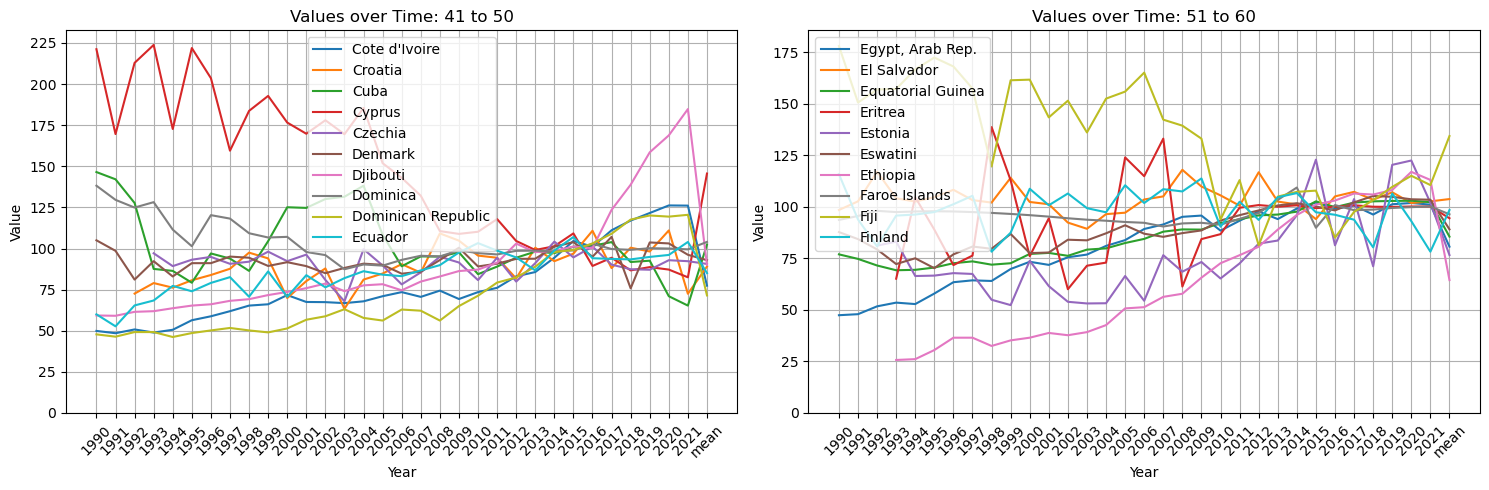

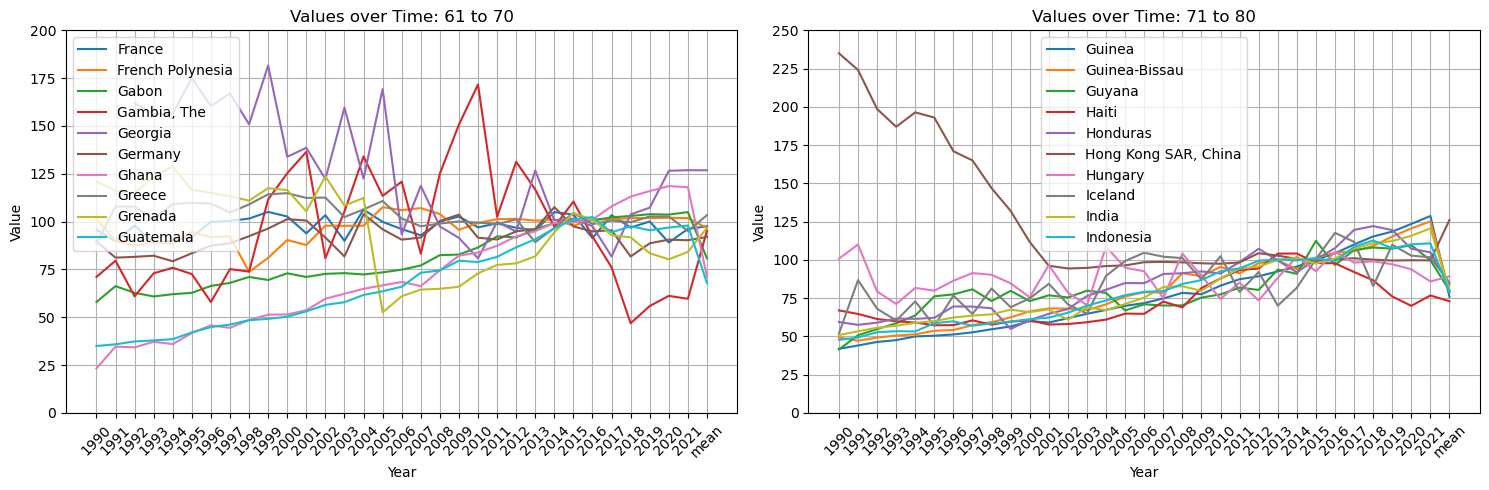

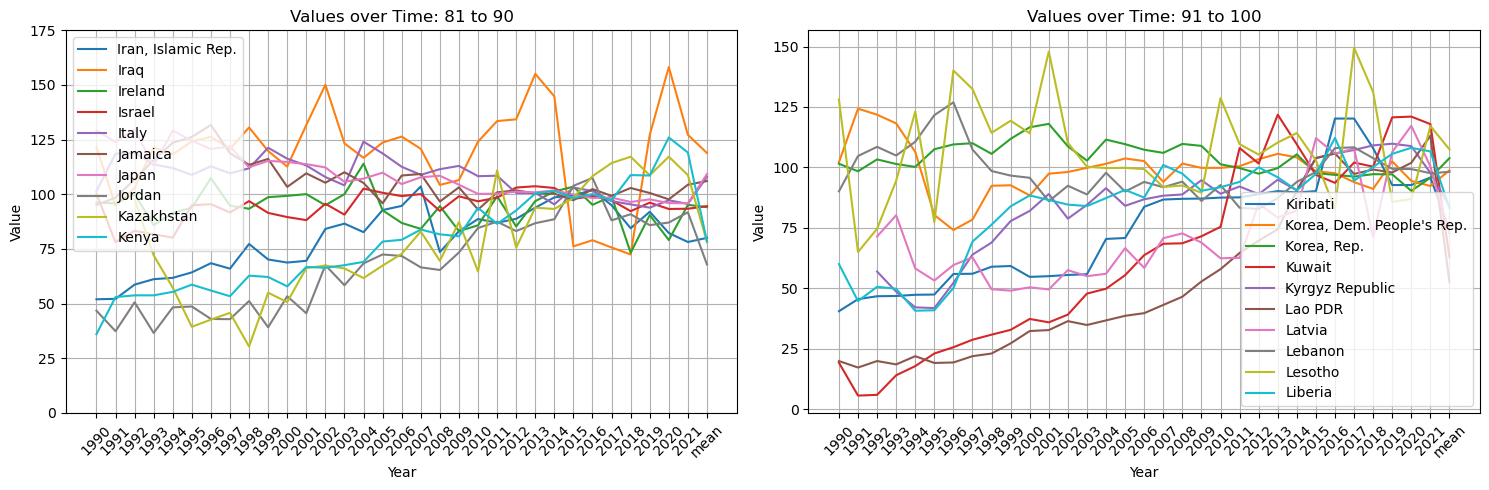

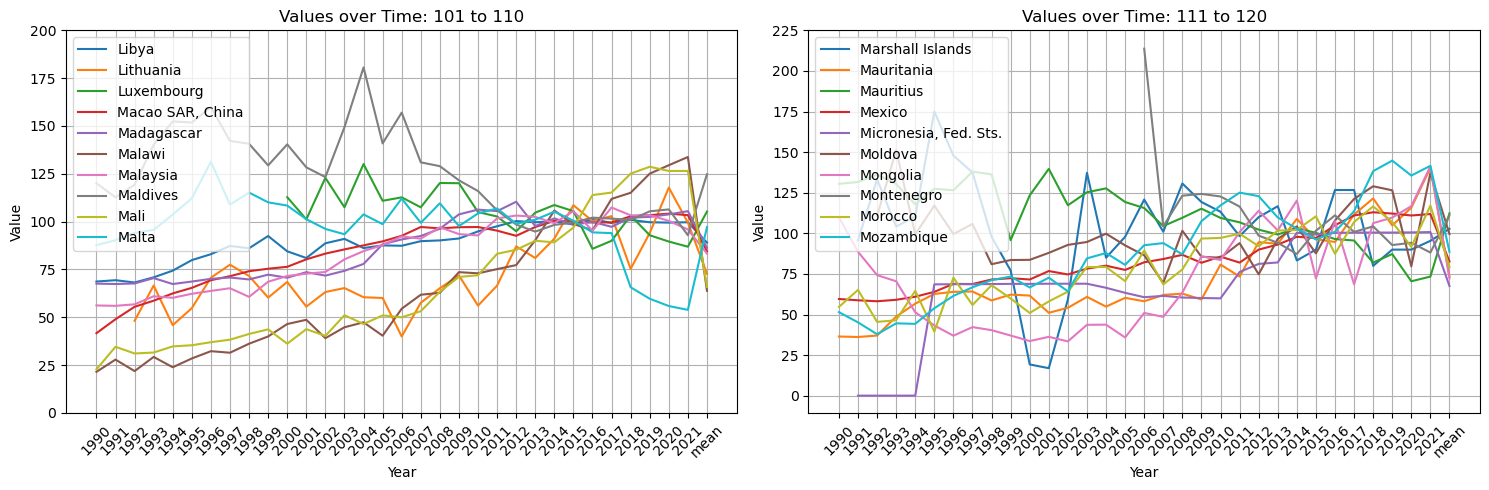

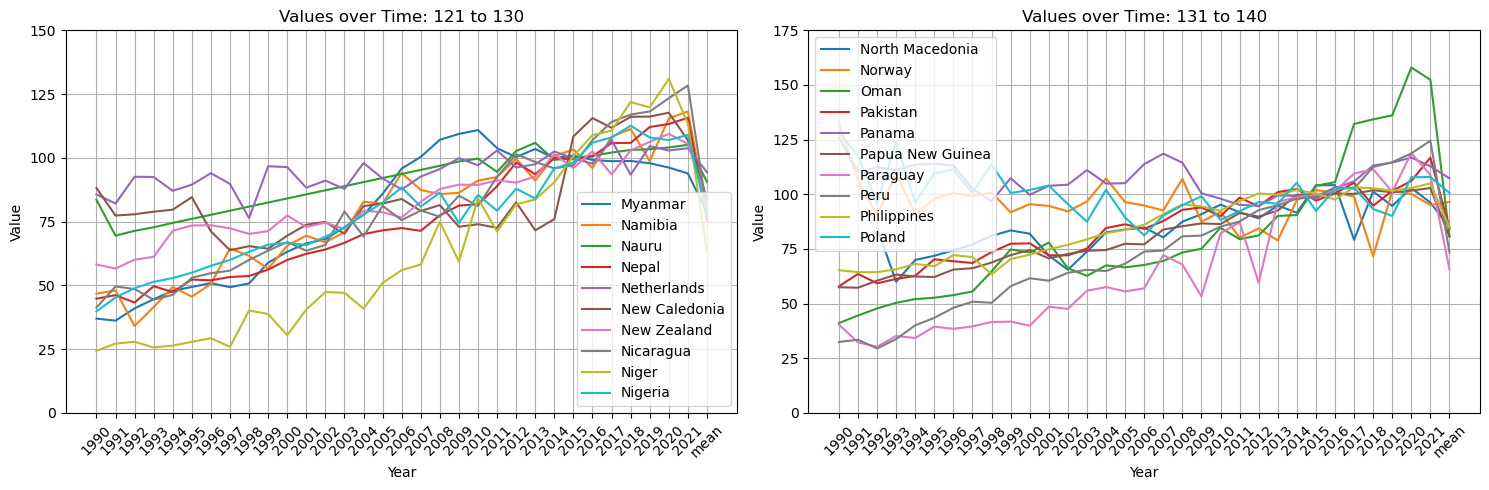

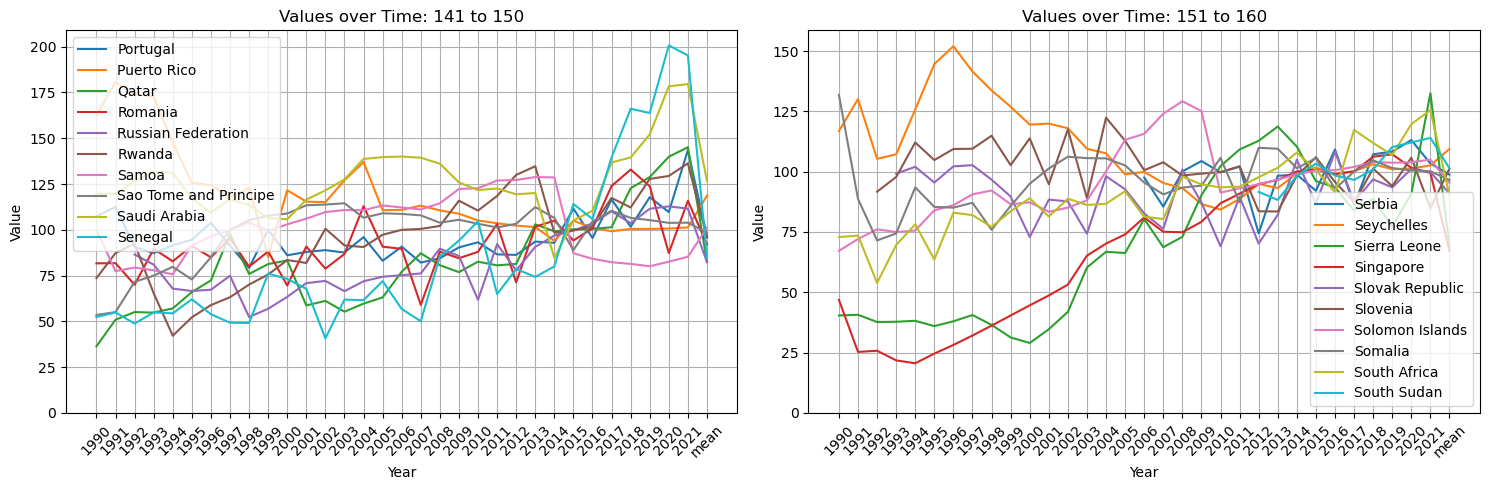

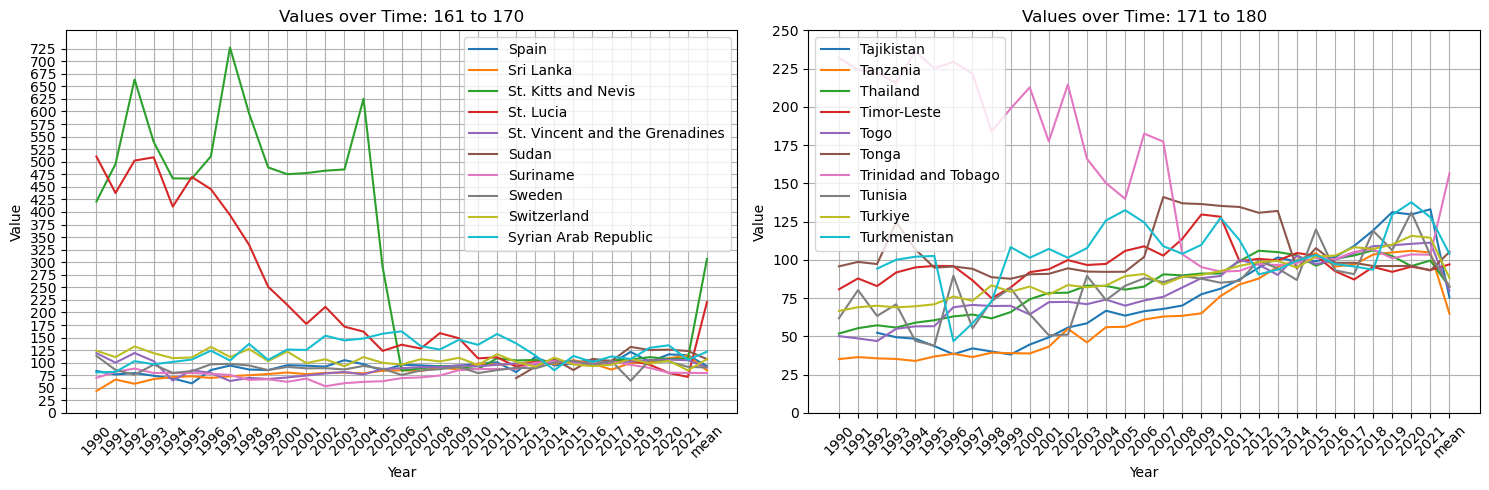

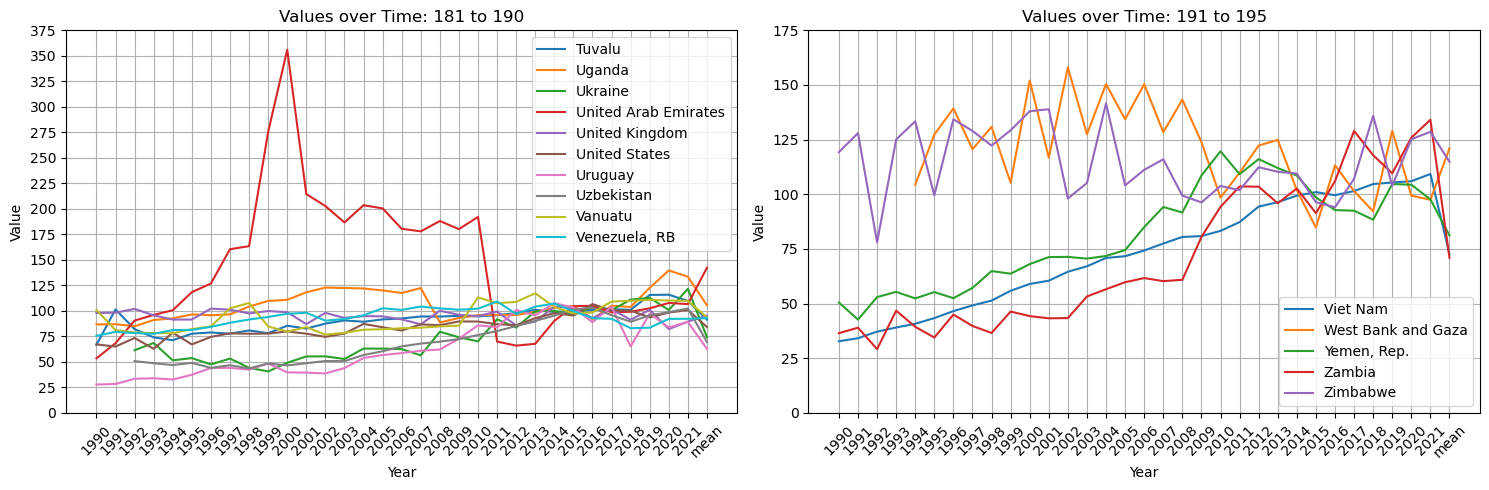

CPU times: total: 10.1 s
Wall time: 13.8 s


In [100]:
%%time

cpg = 10  # Countries per graph

for n in range(0, len(clean_CropProdIndex_df), cpg * 2):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    for i, ax in enumerate(axs):
        start_idx = n + i * cpg
        end_idx = min(n + (i + 1) * cpg, len(clean_CropProdIndex_df))
        for country in clean_CropProdIndex_df.index[start_idx:end_idx]:
            ax.plot(clean_CropProdIndex_df.columns, clean_CropProdIndex_df.loc[country], label=country)
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        ax.set_title(f'Values over Time: {start_idx + 1} to {end_idx}')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
        ax.set_yticks(np.arange(0, clean_CropProdIndex_df.iloc[start_idx:end_idx].max().max() + 20, step=25))
        ax.grid(True)

    plt.tight_layout()
    plt.show()

Considering the amount of countries we would need to add in our visualization, we are problably going to need a filter.

In [91]:
# Get the mean value for each country
mean_values = clean_CropProdIndex_df.mean(axis=1)
clean_CropProdIndex_df.loc[:,'mean'] = mean_values

<Axes: xlabel='mean', ylabel='Count'>

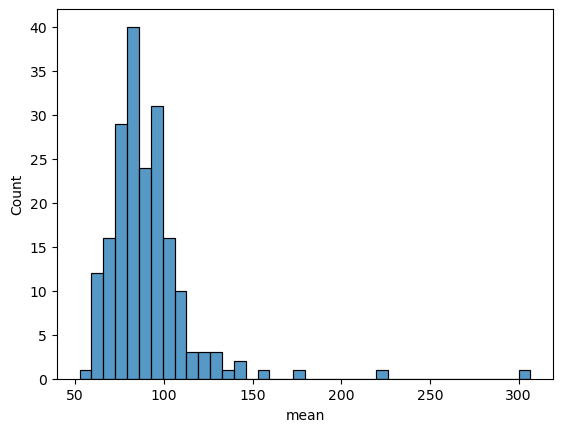

In [92]:
sns.histplot(clean_CropProdIndex_df["mean"])

In [ ]:
# So we clearly have some outliers
clean_CropProdIndex_df[clean_CropProdIndex_df['mean'] > 120]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
,,,,,,,,,,,,,,,,,,,,,
Barbados,247.6,244.5,226.0,202.3,201.1,206.4,257.3,252.1,217.2,237.6,...,117.5,112.8,99.5,87.7,102.5,114.8,97.2,95.4,87.6,174.265625
Cyprus,221.2,169.6,212.9,223.8,172.7,221.9,203.6,159.5,183.7,192.8,...,99.1,101.4,109.2,89.4,94.4,86.7,88.7,87.2,82.5,145.590625
Fiji,177.9,150.5,156.8,157.1,166.6,172.3,168.0,157.3,119.5,161.3,...,104.9,107.2,107.8,85.0,97.5,103.2,109.6,115.0,110.5,134.250000
Georgia,NaN,NaN,161.9,156.3,156.5,175.1,160.3,167.0,150.9,181.6,...,126.8,100.8,101.6,97.6,81.8,103.8,107.3,126.6,126.9,126.853333
"Hong Kong SAR, China",235.0,224.1,198.6,187.0,196.4,193.0,171.0,165.0,146.9,132.0,...,102.8,100.7,98.8,100.5,101.1,100.2,99.6,99.8,99.7,126.106250
Maldives,120.1,112.7,119.3,140.2,152.4,151.8,159.9,142.2,140.7,129.4,...,94.8,98.3,99.6,102.1,101.6,100.9,105.4,106.4,92.9,124.771875
Saudi Arabia,119.7,119.7,126.5,131.8,131.1,117.2,109.4,116.7,113.6,106.4,...,120.1,84.6,105.1,110.4,136.8,139.5,152.1,178.3,179.6,126.668750
St. Kitts and Nevis,420.7,495.5,663.7,539.6,466.9,466.5,510.8,727.3,596.2,488.7,...,105.4,102.0,98.0,100.0,104.3,106.3,111.1,107.6,108.6,306.621875
St. Lucia,510.3,437.8,502.3,508.8,410.7,469.6,445.4,393.8,334.7,251.3,...,101.4,102.3,101.3,96.4,100.4,104.2,96.1,79.7,71.8,220.712500


In [101]:
#TODO: Verify the historical reason for it
clean_CropProdIndex_df[clean_CropProdIndex_df['mean'] > 150]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
,,,,,,,,,,,,,,,,,,,,,
Barbados,247.6,244.5,226.0,202.3,201.1,206.4,257.3,252.1,217.2,237.6,...,117.5,112.8,99.5,87.7,102.5,114.8,97.2,95.4,87.6,174.265625
St. Kitts and Nevis,420.7,495.5,663.7,539.6,466.9,466.5,510.8,727.3,596.2,488.7,...,105.4,102.0,98.0,100.0,104.3,106.3,111.1,107.6,108.6,306.621875
St. Lucia,510.3,437.8,502.3,508.8,410.7,469.6,445.4,393.8,334.7,251.3,...,101.4,102.3,101.3,96.4,100.4,104.2,96.1,79.7,71.8,220.712500
Trinidad and Tobago,232.0,224.2,222.2,215.7,236.3,225.2,229.4,221.7,183.9,198.9,...,96.6,98.0,101.5,100.5,105.2,106.9,101.1,103.6,103.4,156.525000


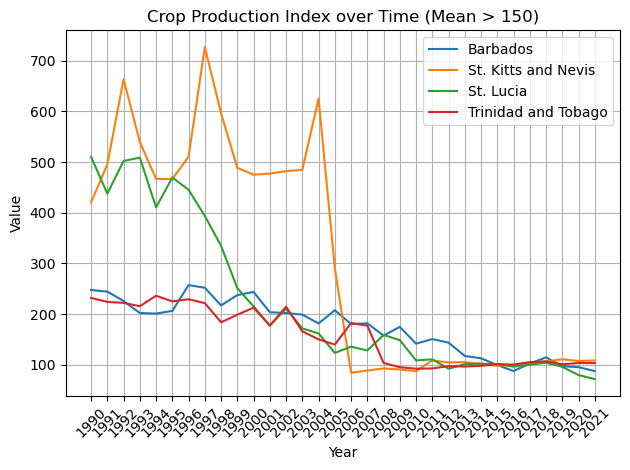

In [106]:
plt.plot(clean_CropProdIndex_df[clean_CropProdIndex_df['mean'] > 150].drop(columns='mean').T)  # Transpose to have years on x-axis
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Crop Production Index over Time (Mean > 150)')
plt.legend(clean_CropProdIndex_df[clean_CropProdIndex_df['mean'] > 150].index)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Observations: 


In [ ]:
#TODO